# pySingleCellNet Vignette

## Importing pySCN functions (Will be packaged soon after all coding is done)

In [53]:
exec(open("utils.py").read())
exec(open("tsp_rf.py").read())
exec(open("scn_train.py").read())
exec(open("plots.py").read())
exec(open("stats.py").read())
from datetime import datetime # not needed just used for timing
# in the future, import pySingleCellNet as pscn

## Load in and view training data (same data as used in SCN tutorial)
#### *can also extract data from AnnData object using makeExpMat and makeSampMat functions

In [34]:
tmData=pd.read_csv("tm10xSubExpDat.csv", index_col=0)
tmSampTab=pd.read_csv("tm10xSubSampTab.csv", index_col=0)
tmSampTab.newAnn= tmSampTab.newAnn.astype(str)
print(tmData.head())
print(tmSampTab.head())

                            Xkr4  Rp1  Sox17  Mrpl15  Lypla1  Tcea1  Rgs20  \
10X_P8_13_AAACGGGTCGCATGGC     0    0      0       0       1      1      0   
10X_P8_13_AAAGCAACATTGGGCC     0    0      0       0       0      0      0   
10X_P8_13_AACTCAGAGGAATTAC     0    0      0       0       1      1      0   
10X_P8_13_AACTTTCTCAAACAAG     0    0      0       0       0      0      0   
10X_P8_13_AATCGGTTCTGCAGTA     0    0      0       0       0      1      0   

                            Atp6v1h  Oprk1  Npbwr1  ...  ERCC-00163  \
10X_P8_13_AAACGGGTCGCATGGC        0      0       0  ...           0   
10X_P8_13_AAAGCAACATTGGGCC        1      0       0  ...           0   
10X_P8_13_AACTCAGAGGAATTAC        1      0       0  ...           0   
10X_P8_13_AACTTTCTCAAACAAG        0      0       0  ...           0   
10X_P8_13_AATCGGTTCTGCAGTA        0      0       0  ...           0   

                            ERCC-00164  ERCC-00165  ERCC-00168  ERCC-00170  \
10X_P8_13_AAACGGGTCGCATGGC

## Split data into training and validation

In [35]:
expTrain, expVal = splitCommon(expData=tmData, ncells=100,sampTab=tmSampTab, dLevel="newAnn")
stTrain=tmSampTab.loc[expTrain.index,:]
stVal=tmSampTab.loc[expVal.index,:]
# 

neuroendocrine cell : 
100
monocyte : 
100
keratinocyte : 
100
mammary_basal_cell : 
100
B cell : 
100
natural killer cell : 
100
granulocyte : 
100
trachea_epithelial : 
100
endocardial cell : 
49
cardiac muscle cell : 
57
kidney capillary endothelial cell : 
100
trachea_mesenchymal : 
100
luminal epithelial cell of mammary gland : 
100
bladder urothelial cell : 
100
hepatocyte : 
100
cardiac_fibroblast : 
100
erythrocyte : 
71
late pro-B cell : 
100
T cell : 
100
erythroblast : 
100
bladder_mesenchymal : 
100
chondrocyte-like : 
100
macrophage : 
100
endothelial cell : 
100
alveolar macrophage : 
59
limb_mesenchymal : 
100
tongue_basal_cell : 
100
kidney_duct_epithelial : 
100
hematopoietic precursor cell : 
100
skeletal muscle satellite cell : 
100
lung_mammary_stromal : 
100
kidney proximal straight tubule epithelial cell : 
100


# Train pySCN (Timed at 00:08:31)

In [38]:
t= datetime.now()

[cgenesA, xpairs, tspRF]= scn_train(stTrain = stTrain, expTrain = expTrain,
                   nTopGenes = 10, nRand = 70, nTrees = 1000,nTopGenePairs = 25, dLevel = "newAnn", stratify=True)

t_fin=datetime.now()
print(t_fin-t)

Matrix normalized


C:\Users\Michael Farid\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Michael Farid\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Michael Farid\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


There are  494  classification genes



C:\Users\Michael Farid\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Michael Farid\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Michael Farid\Anaconda3\lib\site-packages\ipykernel_launcher.py:129: RuntimeWarning: invalid value encountered in sign
C:\Users\Michael Farid\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Michael Farid\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Michael Farid\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in le

There are 767 top gene pairs

Finished pair transforming the data

0:08:31.168101


## Apply to held-out Data

In [39]:
classResVal= scn_predict(cgenesA, xpairs, tspRF, expVal, nrand = 50)

## Plot the classification clustermap 

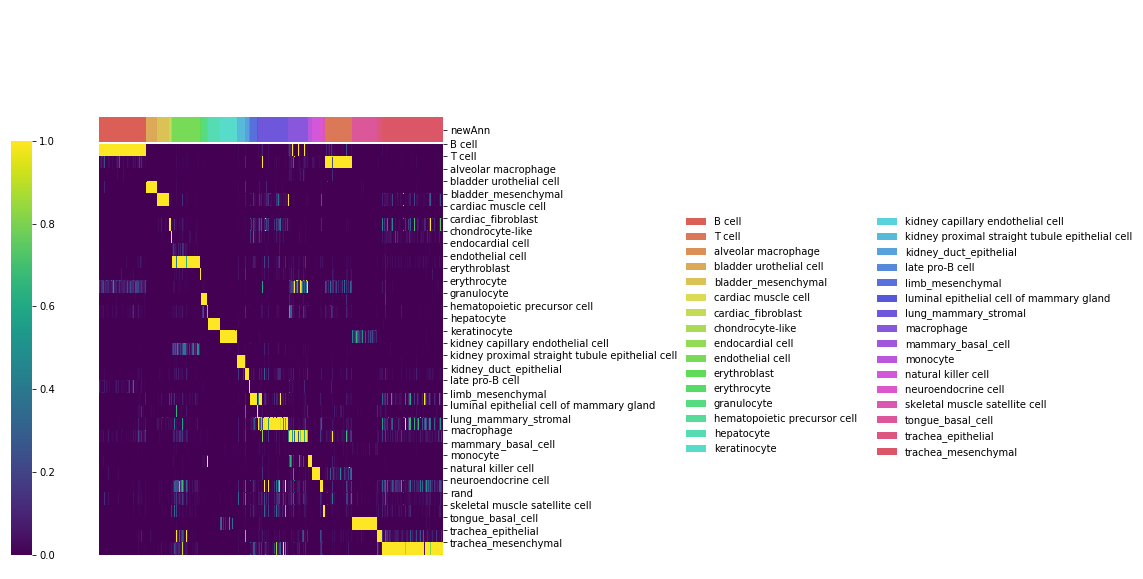

In [79]:
sc_hmClass(classResVal.loc[stVal.index,:], stVal["newAnn"],cRow=False,cCol=False)

## Plot Classification violin plot (note: usually there is way less categories and clutterness) 

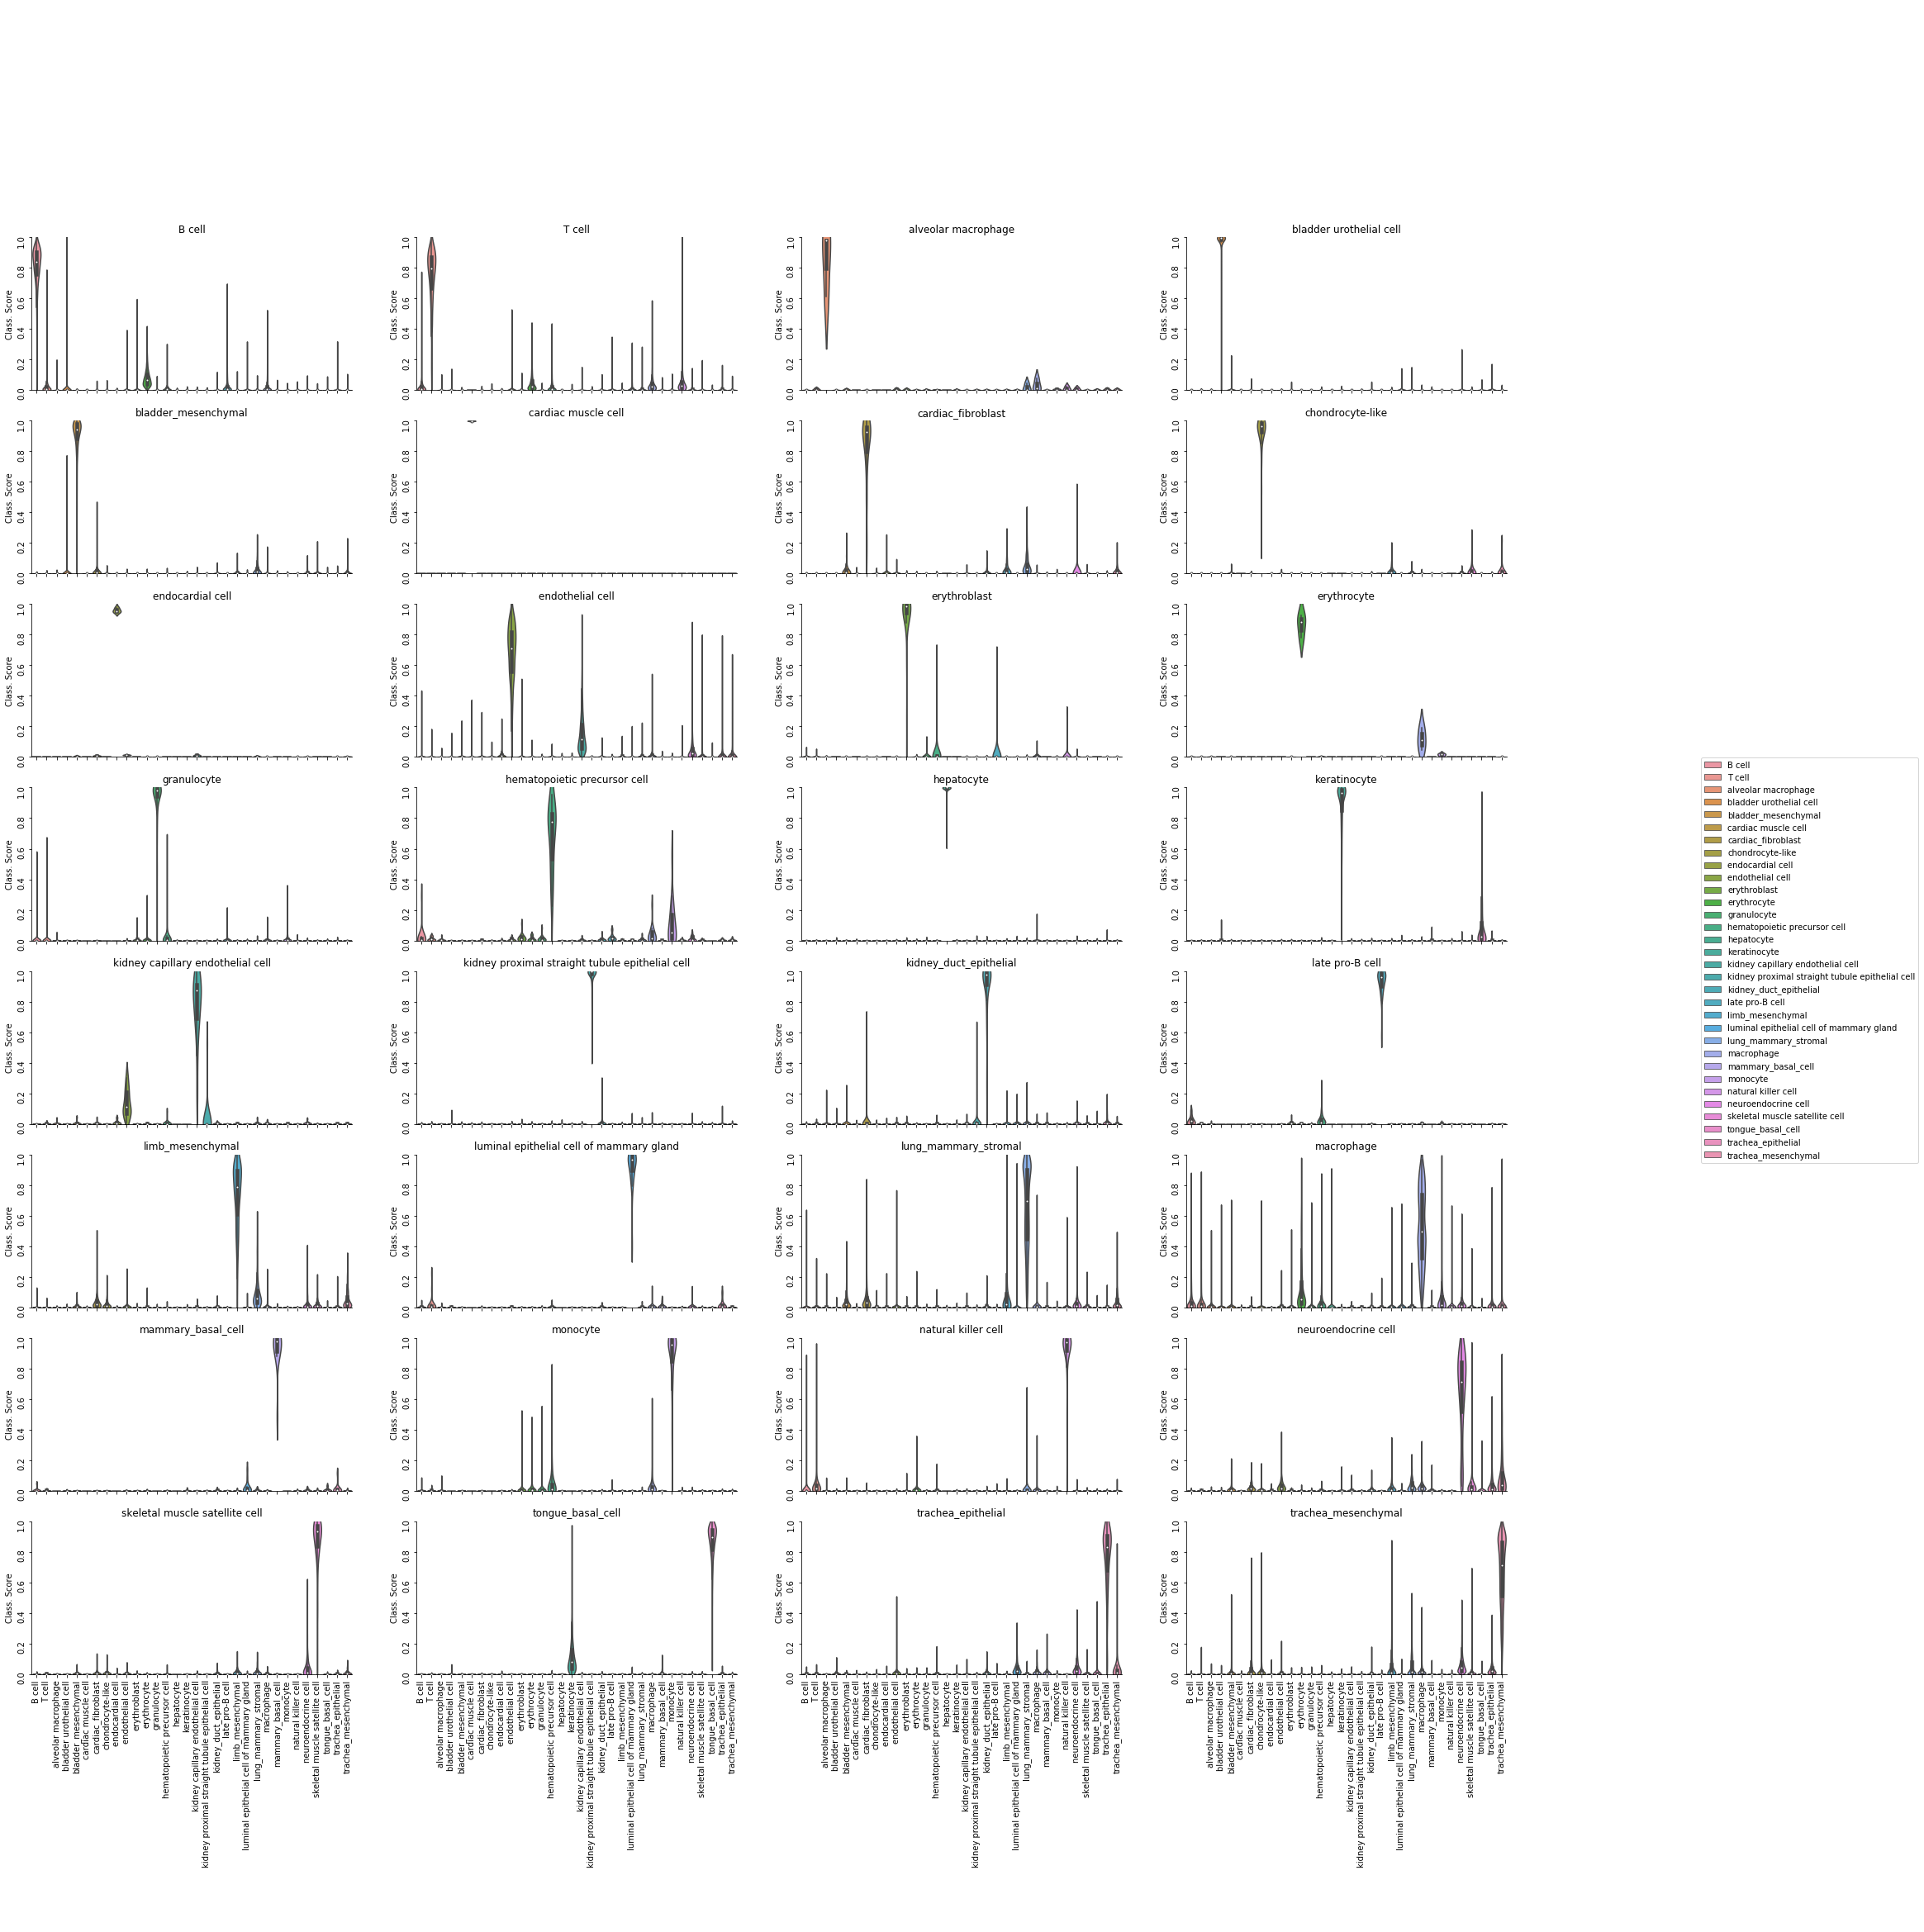

In [54]:
sc_violinClass(stVal, classResVal, threshold=0.5, dLevel="newAnn", ncol=4 )

## Plot attributes bar plot

C:\Users\Michael Farid\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


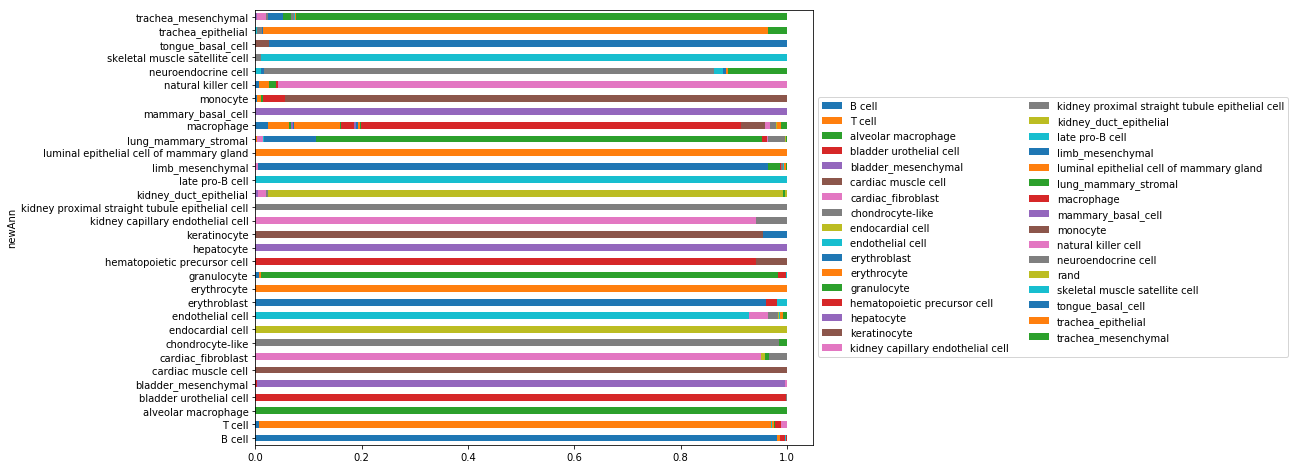

In [47]:
plot_attr(classResVal, stVal, "newAnn")

## For test dataset it is same procedure as if we were classifying the held-out data as shown earlier (no gene filtering or any other step is different or needed)
- although potentially could subset genes to keep common ones between training and testing dataset from the very beginning but i never had to do it to get good results